#Analisis Exploratorio de los Datos

Para este analisis usaré el data que contiene tanto la información de las plataformas como el de los ratings

In [ ]:
#Las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [ ]:
df=pd.read_parquet ('/content/drive/MyDrive/plataformasUsuarioRating.parquet')

Diccionario de variables:

* show_Id . . . . representa el id de la película o show de tv 
* type . . . . . .clasificación de película o tvshow
* title . . . . .nombre de la película o tvshow
* director . . . nombre del director de la película o tvshow  
* cast . . . . . elenco de la película o tvshow
* country. . . . pais de origen de película o tvshow
* date_added . . año en el que realizó la película o tvshow
* release_year . año en que ingresó a la plataforma
* rating . . . . sugerencia de público a quien va dirigido
* duration . ..  duracion de la película o tv show, en minutos o temporadas
* listed_in . .  genero de la peclícula o tv show
*	description. . descripción de la película o tvshow
*	id . . . . . . identificador de la película o tvshow
* duration_int . parte numerica de la duracion 
* duration_type .parte con cadenas de la duración
*	userId . . . . número de identificación del usuario
*	score . . . . .puntuación que el usuario le da a la pelicula o tvshow
* timestamp. . . fecha en que se realizó la puntuación 


In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,userId,score,timestamp
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,543,5.0,2003-07-30


In [ ]:
#Veamos el tamaño de los datos
print('Cantidad de Rows', df.shape[0])
print('Cantidad de Cols', df.shape[1])

Cantidad de Rows 11024165
Cantidad de Cols 18


In [ ]:
#Un poco más de información se puede obtener
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024165 entries, 0 to 11024164
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   show_id        object        
 1   type           object        
 2   title          object        
 3   director       object        
 4   cast           object        
 5   country        object        
 6   date_added     datetime64[ns]
 7   release_year   int64         
 8   rating         object        
 9   duration       object        
 10  listed_in      object        
 11  description    object        
 12  id             object        
 13  duration_int   float64       
 14  duration_type  object        
 15  userId         int64         
 16  score          float64       
 17  timestamp      datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(12)
memory usage: 1.5+ GB


# Revisamos la cantidad de duplicados




In [ ]:
df.duplicated().sum()

10342

In [ ]:
df[df.duplicated()].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,userId,score,timestamp
1079,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,21661,4.0,2016-11-16
1453,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69.0,min,8659,4.0,2001-08-06


In [ ]:
# Corroboramos, al azar, una fila de la máscara empleada en la celda anterior.
df[df.show_id == 's3']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,userId,score,timestamp
995,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,582,5.0,2011-09-24
996,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,614,4.0,2000-11-20
997,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,773,5.0,1999-10-17
998,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,965,3.5,2015-11-08
999,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,1185,3.0,2005-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800795,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,ns3,1.0,season,123416,5.0,2013-03-09
6800796,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,ns3,1.0,season,123484,3.5,2015-09-22
6800797,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,ns3,1.0,season,123504,3.0,1996-12-28
6800798,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,ns3,1.0,season,123925,4.0,2000-08-06


In [ ]:
df.drop_duplicates(inplace = True)

# Revision de datos faltantes

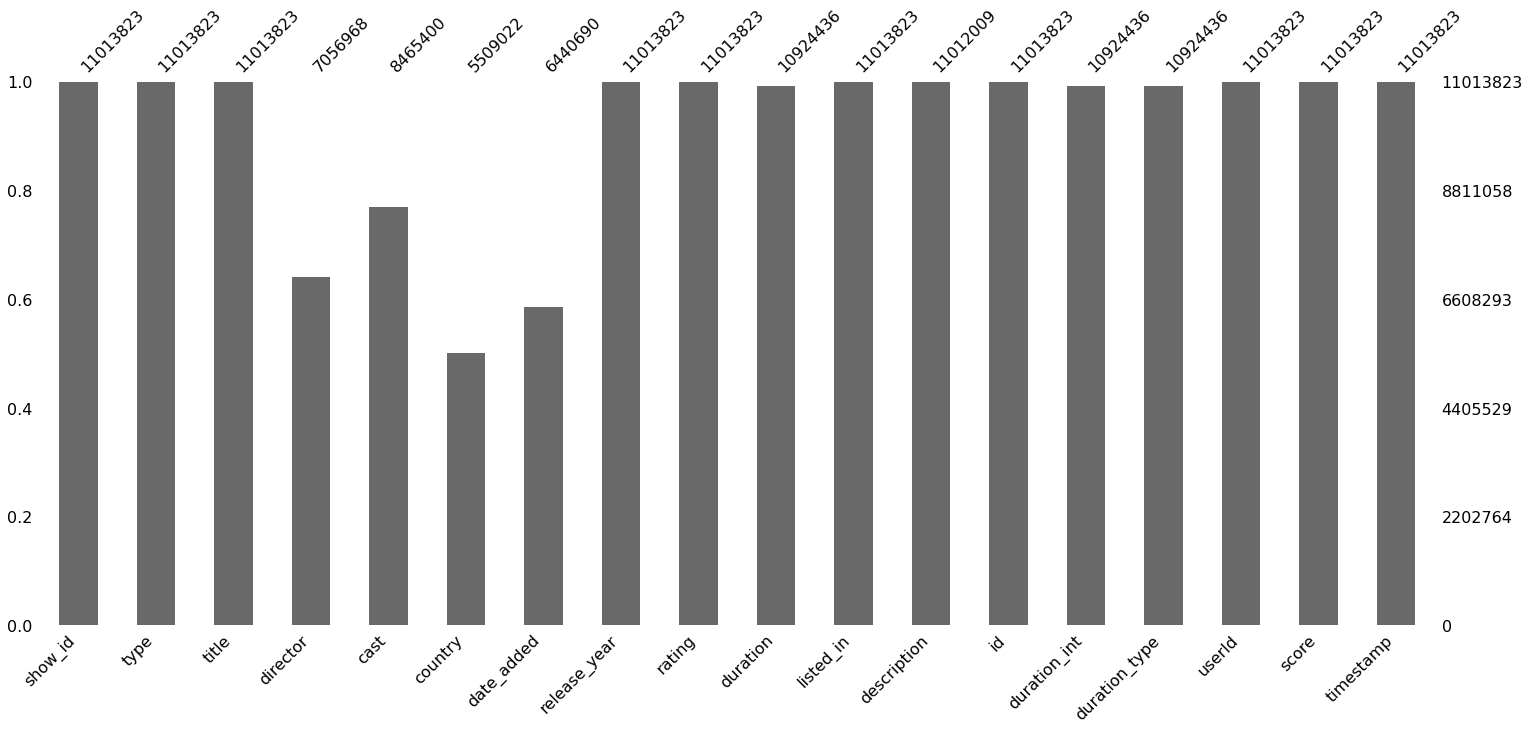

In [ ]:
msno.bar(df)
plt.show()

El anteriro gráfico no nos muestra correctamente todos los nulos por lo que vemos una posicion de los mismos para apreciarlos.

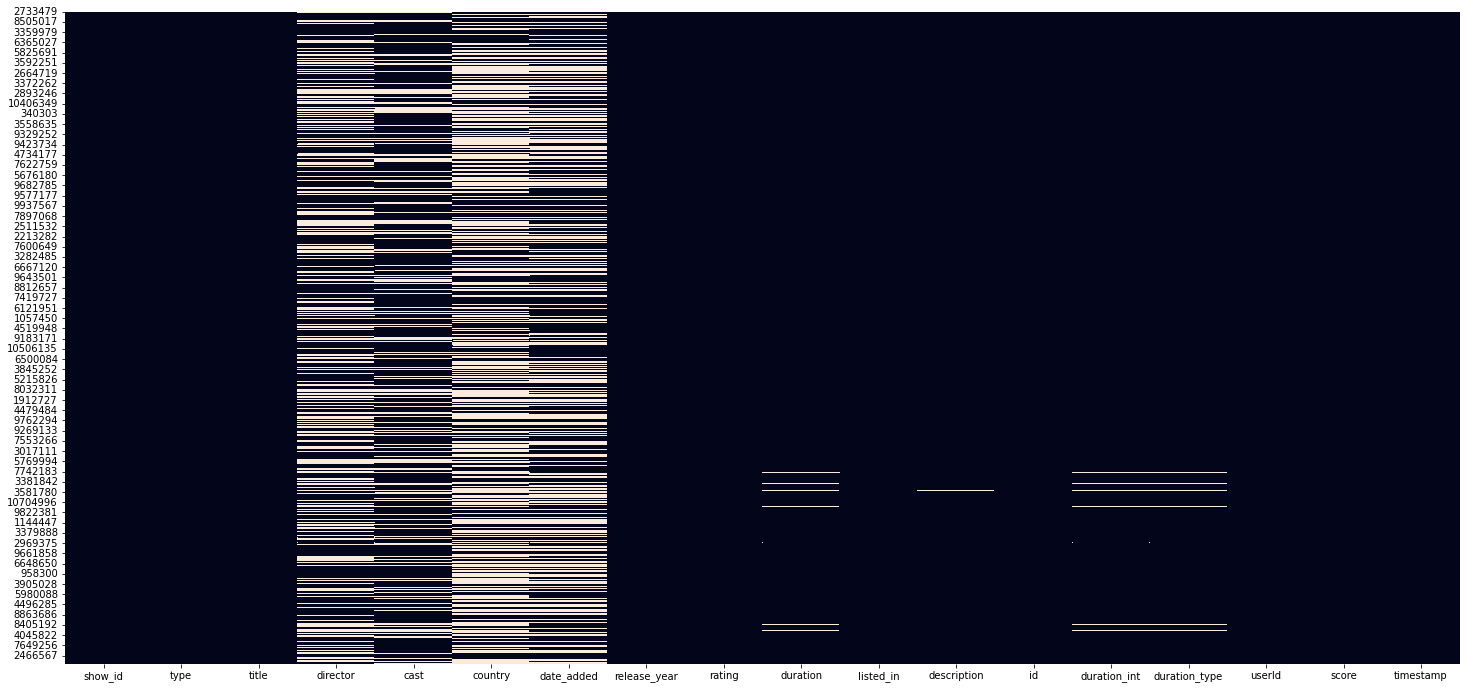

In [ ]:
# veamos de otra forma la visualizacion

plt.figure(figsize= (25,12))
sns.heatmap(df.isnull().sample(3000), cbar=False)
plt.show()

Tenemos una gran cantidad de nulos en cuatro columnas, en la parte de Transformación hicimos algunos cambios como en la columna de rating y tambien rellenamos las columnas por cero en las que se presentaban algunos nan.

#Valores atípcos, más conocidos como outliers

Un outlier es un o varios valores normales, algunas veces podriamos asociarlos con errores, pero no siempre es asi.

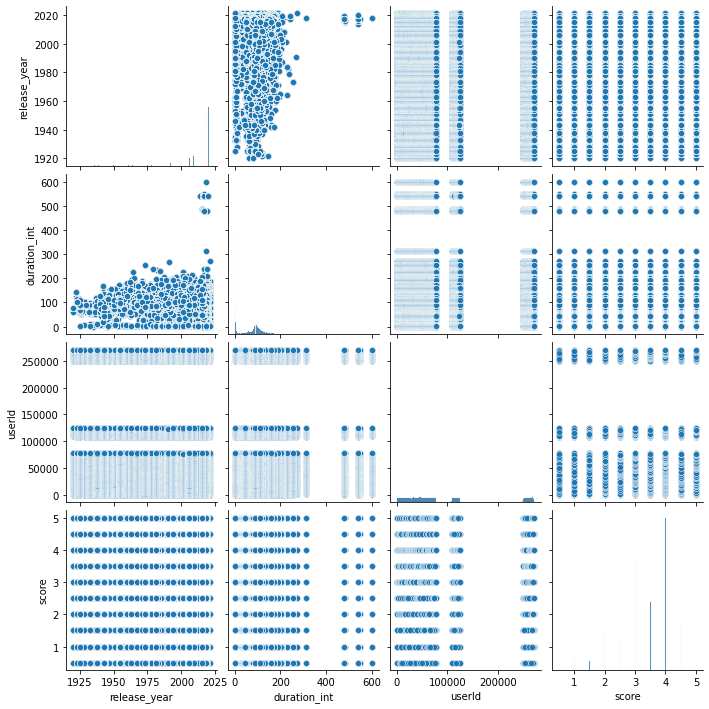

In [ ]:
#Grafiquemos la mayor parte de las columnas con valores int
sns.pairplot(df);

#Codificación de variables categóricas

En los modelos de machine learning se recomienda usar variables numéricas por lo cual se hacen algunas codificaciones, en este trabajo en particular se usará **Labe Encoder**


<p align=center>
<img src='https://www.feedingthemachine.ai/wp-content/uploads/2019/08/LabelEncoder.png' width='50%'>
</p>

In [ ]:
#En el caso particula cambiaremos el id que es la identificacion de las 
#películas de una variable tipo string u object a tipo int

#se de sklean que es una libreria de machine learning se importa LabelEncoder
from sklearn.preprocessing import LabelEncoder

columna = df.id


# Crear un objeto LabelEncoder y ajustarlo a la columna
le = LabelEncoder()
le.fit(columna)

# Transformar la columna usando LabelEncoder
columna_transformada = le.transform(columna)

# Reemplazar la columna original con la columna transformada
df.id = columna_transformada
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,userId,score,timestamp
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,0,113.0,min,543,5.0,2003-07-30
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,0,113.0,min,595,3.0,1996-08-13


#Tambien disponemos de librerias que "automatizan" este proceso de exploración como son 
* pandas profiling
* sweetviz
* autoviz

Las prestaciones de colabs, donde se realiza este trabajo son insuficientes para el tamaño de nuestro dataset.